In [1]:
# Importações

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Leitura de arquivos

covid19CleanCompleteO = pd.read_csv("Arquivos csv/covid_19_clean_complete.csv")
worldOMeterData = pd.read_csv("Arquivos csv/worldometer_data.csv")

1. Quais das regiões tiveram mais mortes? 
R: Americas.


2. Qual momento em que cada progressão começa a subir?
R: Na região'Eastern Mediterranean' a progressão começa a subir entre Junho e Julho;
Na região'Americas' a progressão começa a subir em Abril;
Na região'Europe' a progressão começa a subir entre Março e Abril.


3. Como está a taxa de crescimento de cada progressão?
R: Nas regiões 'Eastern Mediterranean' (Azul) e 'Americas' (Laranja) a taxa de crescimento é praticamente linear, na região 'Europe' (Verde) a taxa cresce exponencialmente.


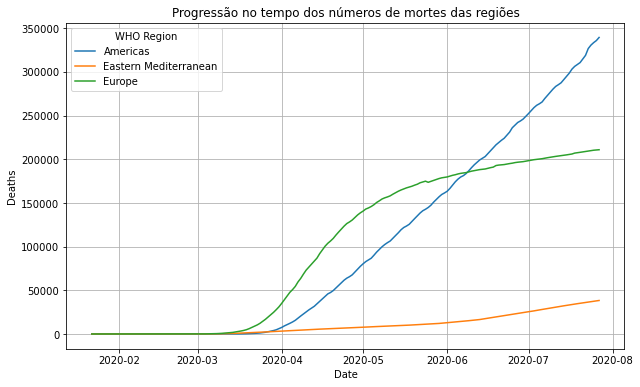

In [10]:
# Questão 5.1 - 1
# Agrupando a tabela por data e região usando a função de agrupamento "sum" na coluna 'Deaths' para obter o número de mortes por
# região em um dia
covid19CleanComplete = covid19CleanCompleteO
covid19CleanComplete["Date"] = pd.to_datetime(covid19CleanComplete["Date"], format="%Y-%m-%d")
covid19CleanComplete = covid19CleanComplete.groupby(['Date', 'Country/Region'])[[
    'WHO Region', 'Deaths']].max().reset_index().drop(['Country/Region'],
     axis = 1).groupby(['Date', 'WHO Region'])[['Deaths']].sum().drop(
        ['South-East Asia', 'Africa','Western Pacific'], axis=0,level='WHO Region').reset_index()

# Plotando o gráfico
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Progressão no tempo dos números de mortes das regiões") # Add título

# Gráfico de linhas mostrando as progressões no tempo dos números de mortes das regiões 'Eastern Mediterranean', 'Americas' e 
# 'Europe'
sns.lineplot(x = covid19CleanComplete['Date'], y = covid19CleanComplete['Deaths'], hue = covid19CleanComplete['WHO Region'])
plt.ylabel("Deaths")
plt.grid()

# Respondendo as perguntas da apostila
print("1. Quais das regiões tiveram mais mortes? \nR: Americas.")
print("\n")
print("2. Qual momento em que cada progressão começa a subir?")
print("R: Na região'Eastern Mediterranean' a progressão começa a subir entre Junho e Julho;")
print("Na região'Americas' a progressão começa a subir em Abril;")
print("Na região'Europe' a progressão começa a subir entre Março e Abril.")
print("\n")
print("3. Como está a taxa de crescimento de cada progressão?")
print("R: Nas regiões 'Eastern Mediterranean' (Azul) e 'Americas' (Laranja) a taxa de crescimento é praticamente linear, na região 'Europe' (Verde) a taxa cresce exponencialmente.")

1. Quais os 2 continentes com maior número de mortes? 
R: Europa e América do Sul.


2. Qual o continente com menor número de mortes? 
R: Australia/Oceania.


3. Qual sua hipótese para responder às perguntas anteriores?
R: Na primeira questão foi utilizado a hipótese de maior barra maior número de mortes e na segunda questão foi utilizado a hipótese de que menor a barra menor o número de mortes.


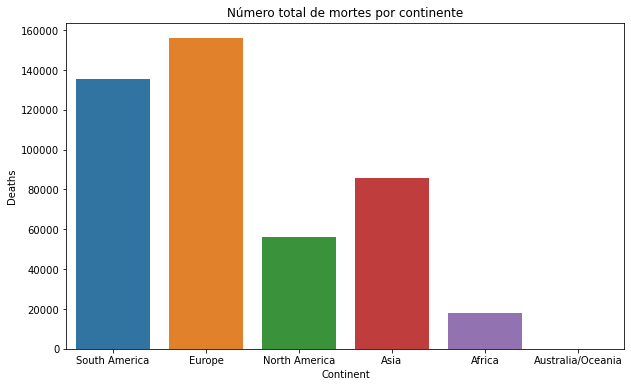

In [13]:
# Questão 5.2 - 1
# Código para conseguir o dataframe da exercício 4.1 - 4
worldOMeterDataO = pd.read_csv("Arquivos csv/worldometer_data.csv")
worldOMeterData = worldOMeterDataO[['Population', 'Country/Region', 'Continent']]

covid19CleanComplete_country = covid19CleanCompleteO.groupby(['Country/Region']
                                                            )[['Deaths']].max(
                                                            ).reset_index()

covid19_world = pd.merge(covid19CleanComplete_country, worldOMeterData,
                          how = 'outer')

covid19_world_continent = covid19_world.groupby(['Continent'])[['Deaths',
                                                                 'Population']].sum()

deaths_per_million = []
for i in range(covid19_world_continent.shape[0]):
    if pd.notna(covid19_world_continent['Population'])[i] == True and pd.notna(
        covid19_world_continent['Deaths'])[i] == True:
        deaths_per_million.append((covid19_world_continent['Deaths'][i] / covid19_world_continent[
            'Population'][i])*(10**6))
    else:
        deaths_per_million.append(0)
    i += 1

covid19_world_continent['Deaths per million'] = deaths_per_million

covid19_world_continent = covid19_world_continent.sort_values(by = 'Deaths per million', 
                                                              ascending = False).reset_index()

# Plotando o gráfico
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Número total de mortes por continente") # Add título

# Gráfico de barras mostrando o número total de mortes por continente
sns.barplot(x = covid19_world_continent['Continent'], y = covid19_world_continent['Deaths'])

# Respondendo as perguntas da apostila
print("1. Quais os 2 continentes com maior número de mortes? \nR: Europa e América do Sul.")
print("\n")
print("2. Qual o continente com menor número de mortes? \nR: Australia/Oceania.")
print("\n")
print("3. Qual sua hipótese para responder às perguntas anteriores?")
print("R: Na primeira questão foi utilizado a hipótese de maior barra maior número de mortes e na segunda questão foi utilizado a hipótese de que menor a barra menor o número de mortes.")

Os 3 continentes com maiores média morte por milhão de habitante são 
 Continent
South America    216.769231
Europe           214.955556
North America    110.607143
Name: Deaths/1M pop, dtype: float64


1. Onde se concentram a maioria dos dados?
R: A maioria dos dados está concentrado entre 0 e 200 mortes por milhão de habitante.


2. No segundo continente por mais mortes por milhão, é possível perceber alguma relação entre as feastures?
R: Sim, a maioria dos países com maior população tem mais mortes por milhão.


3. Pelo gráfico, é possível enxergar relação entre essas colunas do banco de dados?
R: Sim, porém para verificar melhor essa relação, talvez seja melhor acrescentar uma regressão linear, que é a linha da junção dos pontos que se adapta melhor aos dados.


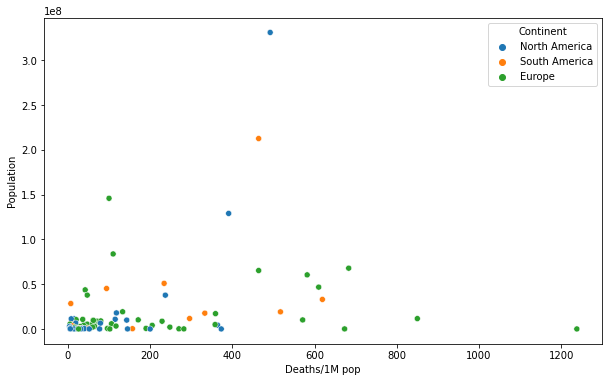

In [14]:
#Questão 5.3 - 1
# Agrupando o dataframe pela coluna 'Continent' e tirando a média da coluna 
# 'Deaths/1M pop' para descobrir os 3 continentes com maiores números
worldOMeterData_continent = worldOMeterDataO.groupby(['Continent'])[
    'Deaths/1M pop'].mean().sort_values(ascending = False)
print('Os 3 continentes com maiores média morte por milhão de habitante são \n',
       worldOMeterData_continent.head(3))
worldOMeterData = worldOMeterDataO.set_index('Continent').drop(['Asia', 
                                                                'Africa',
                                                                'Australia/Oceania']
                                                                ).reset_index()

# Plotando o gráfico
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
sns.scatterplot(x = worldOMeterData['Deaths/1M pop'], y = worldOMeterData['Population'], hue = worldOMeterData['Continent'])

# Respondendo as perguntas da apostila
print("\n")
print("1. Onde se concentram a maioria dos dados?")
print("R: A maioria dos dados está concentrado entre 0 e 200 mortes por milhão de habitante.")
print("\n")
print("2. No segundo continente por mais mortes por milhão, é possível perceber alguma relação entre as feastures?")
print("R: Sim, a maioria dos países com maior população tem mais mortes por milhão.")
print("\n")
print("3. Pelo gráfico, é possível enxergar relação entre essas colunas do banco de dados?")
print("R: Sim, porém para verificar melhor essa relação, talvez seja melhor acrescentar uma regressão linear, que é a linha da junção dos pontos que se adapta melhor aos dados.")